In [1]:
# -*- coding: utf-8 -*-
import pandas as pd  # 导入数据分析库Pandas
from scipy.interpolate import lagrange  # 导入拉格朗日插值函数

inputfile = '../data/catering_sale.xls'  # 销量数据路径
outputfile = '../tmp/sales.xls'  # 输出数据路径

data = pd.read_excel(inputfile)  # 读入数据
data['销量'][(data['销量'] < 400) | (data['销量'] > 5000)] = None  # 过滤异常值，将其变为空值


# 自定义列向量插值函数
# s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s, n, k=5):
    y = s[list(range(max(n - k, 0), n)) + list(range(n + 1, n + 1 + k))]  # 取数
    y = y[y.notnull()]  # 剔除空值
    return lagrange(y.index, list(y))(n)  # 插值并返回插值结果


# 逐个元素判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:  # 如果为空即插值。
            # print(i)
            # print(data[i])
            # print(j)
            # print(data[i][j])
            data[i][j] = ployinterp_column(data[i], j)

data.to_excel(outputfile)  # 输出结果，写入文件

C:\Users\23571\AppData\Local\Temp\ipykernel_7220\1724951244.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销量'][(data['销量'] < 400) | (data['销量'] > 5000)] = None  # 过滤异常值，将其变为空值
C:\Users\23571\AppData\Local\Temp\ipykernel_7220\1724951244.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = ployinterp_column(data[i], j)
C:\Users\23571\AppData\Local\Temp\ipykernel_7220\1724951244.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [2]:
x = [1, 2, 3, 4, 5]
y = [2618.2, 2608.4, 2651.9, 3442.1, 3393.1]
f = lagrange(x, y)(0)
print(f)

-291.4000000000001


In [3]:
# -*- coding: utf-8 -*-

# 代码4-2  数据规范化
import pandas as pd
import numpy as np

datafile = '../data/normalization_data.xls'  # 参数初始化
data = pd.read_excel(datafile, header=None)  # 读取数据
print(data)
print("__________________________________________________________")
data1 = (data - data.min()) / (data.max() - data.min())  # 最小-最大规范化
print(data1)
print("__________________________________________________________")
data2 = (data - data.mean()) / data.std()  # 零-均值规范化
print(data2)
print("__________________________________________________________")
data3 = data / 10 ** np.ceil(np.log10(data.abs().max()))  # 小数定标规范化
print(data3)

     0    1    2     3
0   78  521  602  2863
1  144 -600 -521  2245
2   95 -457  468 -1283
3   69  596  695  1054
4  190  527  691  2051
5  101  403  470  2487
6  146  413  435  2571
__________________________________________________________
          0         1         2         3
0  0.074380  0.937291  0.923520  1.000000
1  0.619835  0.000000  0.000000  0.850941
2  0.214876  0.119565  0.813322  0.000000
3  0.000000  1.000000  1.000000  0.563676
4  1.000000  0.942308  0.996711  0.804149
5  0.264463  0.838629  0.814967  0.909310
6  0.636364  0.846990  0.786184  0.929571
__________________________________________________________
          0         1         2         3
0 -0.905383  0.635863  0.464531  0.798149
1  0.604678 -1.587675 -2.193167  0.369390
2 -0.516428 -1.304030  0.147406 -2.078279
3 -1.111301  0.784628  0.684625 -0.456906
4  1.657146  0.647765  0.675159  0.234796
5 -0.379150  0.401807  0.152139  0.537286
6  0.650438  0.421642  0.069308  0.595564
__________________________

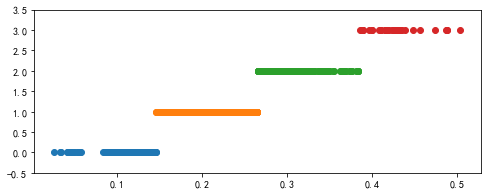

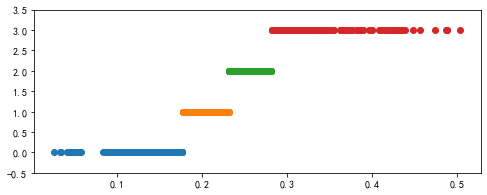

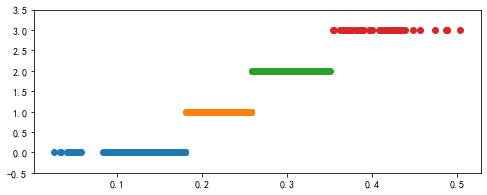

In [4]:
# -*- coding: utf-8 -*-

# 代码4-3  数据离散化
import pandas as pd
import numpy as np

datafile = '../data/discretization_data.xls'  # 参数初始化
data = pd.read_excel(datafile)  # 读取数据
data = data['肝气郁结证型系数'].copy()
k = 4

d1 = pd.cut(data, k, labels=range(k))  # 等宽离散化，各个类比依次命名为0,1,2,3

#等频率离散化
w = [1.0 * i / k for i in range(k + 1)]
w = data.describe(percentiles=w)[4:4 + k + 1]  # 使用describe函数自动计算分位数
w[0] = w[0] * (1 - 1e-10)
d2 = pd.cut(data, w, labels=range(k))

from sklearn.cluster import KMeans  # 引入KMeans

kmodel = KMeans(n_clusters=k)  # 建立模型，n_jobs是并行数，一般等于CPU数较好
kmodel.fit(np.array(data).reshape((len(data), 1)))  # 训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)  # 输出聚类中心，并且排序（默认是随机序的）
w = c.rolling(2).mean()  # 相邻两项求中点，作为边界点
w = w.dropna()
w = [0] + list(w[0]) + [data.max()]  # 把首末边界点加上
d3 = pd.cut(data, w, labels=range(k))


def cluster_plot(d, k):  # 自定义作图函数来显示聚类结果
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    plt.figure(figsize=(8, 3))
    for j in range(0, k):
        plt.plot(data[d == j], [j for i in d[d == j]], 'o')

    plt.ylim(-0.5, k - 0.5)
    return plt


cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()

In [45]:
# -*- coding: utf-8 -*-

# 代码4-4 线损率属性构造
import pandas as pd

# 参数初始化
inputfile = '../data/electricity_data.xls'  # 供入供出电量数据
outputfile = '../tmp/electricity_data.xls'  # 属性构造后数据文件

data = pd.read_excel(inputfile)  # 读入数据
data['线损率'] = (data['供入电量'] - data['供出电量']) / data['供入电量']

data.to_excel(outputfile, index=False)  # 保存结果

C:\Users\23571\AppData\Local\Temp\ipykernel_2340\3717842720.py:13: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel(outputfile, index=False)  # 保存结果


In [46]:
# -*- coding: utf-8 -*-

# 代码4-5  小波变换特征提取代码
# 利用小波分析进行特征分析
# 参数初始化
inputfile = '../data/leleccum.mat'  # 提取自Matlab的信号文件

from scipy.io import loadmat  # mat是Python专用格式，需要用loadmat读取它

mat = loadmat(inputfile)
signal = mat['leleccum'][0]

import pywt  # 导入PyWavelets

coeffs = pywt.wavedec(signal, 'bior3.7', level=5)
# 返回结果为level+1个数字，第一个数组为逼近系数数组，后面的依次是细节系数数组
print(coeffs)

[array([2415.1478541 , 2395.74470824, 2402.22022728, 2408.90987352,
       2402.22022728, 2395.74470824, 2415.1478541 , 2369.53622493,
       1958.0913368 , 1983.87619596, 1901.68851538, 1651.86483216,
       1482.45129628, 1356.98779058, 1257.4459793 , 1265.75505172,
       1363.66712581, 1427.53767222, 1568.87951307, 1893.80694993,
       2295.89161125, 2555.9239482 , 2778.31817145, 2871.0940301 ,
       2954.38189098, 2981.0281365 , 2986.06286012, 3091.56214184,
       3085.0678644 , 2840.05639099, 2782.74679521, 2776.99922688,
       2833.0658032 , 2907.76710805, 2496.58749928, 2443.95791914,
       2338.50723857, 2394.15834442, 2186.86013504, 2142.10730351,
       2066.37469747, 2097.47366057, 2190.20987484, 2024.82470966,
       1999.88792082, 1761.22260043, 2012.8983115 , 1733.14320566,
       1955.69105593, 2296.53399998, 2332.11621828, 2436.91433782,
       2248.43497823, 1928.01215666, 1900.73383661, 1804.08152916,
       1596.93576991, 1375.26325034, 1301.52662997, 1239.1542

In [6]:
# -*- coding: utf-8 -*-

# 代码4-6 主成分分析降维
import pandas as pd

# 参数初始化
inputfile = '../data/principal_component.xls'
outputfile = '../tmp/dimention_reducted.xls'  # 降维后的数据

data = pd.read_excel(inputfile, header=None)  # 读入数据

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

pca.components_  # 返回模型的各个特征向量
pca.explained_variance_ratio_  # 返回各个成分各自的方差百分比

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

In [7]:
# 代码4-7 计算成分结果
pca = PCA(3)
pca.fit(data)
low_d = pca.transform(data)  # 用它来降低维度
pd.DataFrame(low_d).to_excel(outputfile)  # 保存结果
pca.inverse_transform(low_d)  # 必要时可以用inverse_transform()函数来复原数据

low_d

C:\Users\23571\AppData\Local\Temp\ipykernel_7220\2618027899.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(low_d).to_excel(outputfile)  # 保存结果


array([[  8.19133694,  16.90402785,   3.90991029],
       [  0.28527403,  -6.48074989,  -4.62870368],
       [-23.70739074,  -2.85245701,  -0.4965231 ],
       [-14.43202637,   2.29917325,  -1.50272151],
       [  5.4304568 ,  10.00704077,   9.52086923],
       [ 24.15955898,  -9.36428589,   0.72657857],
       [ -3.66134607,  -7.60198615,  -2.36439873],
       [ 13.96761214,  13.89123979,  -6.44917778],
       [ 40.88093588, -13.25685287,   4.16539368],
       [ -1.74887665,  -4.23112299,  -0.58980995],
       [-21.94321959,  -2.36645883,   1.33203832],
       [-36.70868069,  -6.00536554,   3.97183515],
       [  3.28750663,   4.86380886,   1.00424688],
       [  5.99885871,   4.19398863,  -8.59953736]])

In [40]:
# -*- coding: utf-8 -*-

# 代码4-8 求向量D中的单值元素，并返回相关索引
import pandas as pd
import numpy as np

D = pd.Series([1, 1, 2, 3, 5])
D.unique()
np.unique(D)

array([1, 2, 3, 5], dtype=int64)

In [41]:
# 代码 4-9 对一个10×4维的随机矩阵进行主成分分析
from sklearn.decomposition import PCA

D = np.random.rand(10, 4)
pca = PCA()
pca.fit(D)
pca.components_  # 返回模型的各个特征向量
pca.explained_variance_ratio_  # 返回各个成分各自的方差百分比

array([0.48330919, 0.25372028, 0.13942515, 0.12354538])